# Imports

In [ ]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image
import os
import numpy as np
from scipy.io import loadmat
import cv2

# from extract_features import extract_features
# from check_webers_law import check_webers_law
# from layerwise_mi_figures import layerwise_mi_figures


In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is not available, using CPU instead


# Models

In [ ]:
# Load pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
vgg16_rand = models.vgg16(pretrained=False)

# Randomly initialize the weights of the model
def weights_init(m):
    if isinstance(m, torch.nn.Conv2d) or isinstance(m, torch.nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            torch.nn.init.constant_(m.bias, 0)

# Apply random initialization to the model
vgg16_rand.apply(weights_init)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vggface = models.vgg19(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
resnet = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 63.0MB/s]


In [ ]:
resnet_rand = models.resnet50(pretrained=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Dataset

In [32]:
import os

os.chdir('/content/')
# Get the list of files and directories in the current directory


In [33]:
import zipfile
import os

# Define the path to your zip file
zip_file_path = 'images.zip'

# Define the directory where you want to extract the contents
extract_to_dir = 'images'

# Create the directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extract_to_dir)

print("Extraction complete!")


Extraction complete!


In [34]:
import os

directory = 'images/images/inv_up'
os.makedirs(directory, exist_ok=True)
directory = 'images/images/normal_down'
os.makedirs(directory, exist_ok=True)




inverted_path = 'images/images/inverted_images'
normal_path = 'images/images/normal_images'

for filename in os.listdir(inverted_path):
    # Check if the file is an image (you can add more image extensions as needed)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full path to the image file
        image_path = os.path.join(inverted_path, filename)
        # Open the image
        image = Image.open(image_path)
        # Invert the image
        inverted_image = image.rotate(180)
        # Display or save the inverted image
        inverted_image.show()
        # Get the filename without the extension
        filename_ = os.path.splitext(filename)[0]
        # If you want to save the inverted image
        inverted_image.save(f'images/images/inv_up/{filename_}.jpg')


for filename in os.listdir(normal_path):
    # Check if the file is an image (you can add more image extensions as needed)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full path to the image file
        image_path = os.path.join(normal_path, filename)
        # Open the image
        image = Image.open(image_path)
        # Invert the image
        inverted_image = image.rotate(180)
        # Display or save the inverted image
        inverted_image.show()
        # If you want to save the inverted image
        filename_ = os.path.splitext(filename)[0]
        inverted_image.save(f'images/images/normal_down/{filename_}.jpg')

# Tatcher

In [ ]:
def tatcher(feature):
    dist = np.linalg.norm(feature[1] - feature[0])
    dist_up = np.linalg.norm(feature[3] - feature[2])
    return ((dist-dist_up)/(dist+dist_up))


# VGG16

In [ ]:
import time
from PIL import Image
import os

# Function to preprocess image
def preprocess_image(image_path):

    transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image_path)
    return image


def extract_features(model):
    model.eval()  # Set the model to evaluation mode

    # Access VGG components
    vgg16Features = model.features
    vgg16AvgPool = model.avgpool
    vgg16Linear = model.classifier

    inverted_path = 'images/images/inverted_images'
    normal_path = 'images/images/normal_images'
    nd_path = 'images/images/normal_down'
    iu_path = 'images/images/inv_up'
    features= []
    iter = 0
    for filename in os.listdir(inverted_path):
      feat = []  # Initialize feat list inside the loop
      if filename.endswith('.jpg') or filename.endswith('.png'):
          image_path = os.path.join(inverted_path, filename)
          inv = Image.open(image_path)
          image_path = os.path.join(normal_path, filename)
          norm_up = Image.open(image_path)
          image_path = os.path.join(nd_path, filename)
          norm = Image.open(image_path)
          image_path = os.path.join(iu_path, filename)
          inv_up = Image.open(image_path)
          images = [inv, norm, inv_up, norm_up]
          for g in images:
              image_features = []  # Features for the current image
              image_tensor = preprocess_image(g).unsqueeze(0)
              with torch.no_grad():
                  for layer in vgg16Features:
                      image_tensor = layer(image_tensor)
                      if isinstance(layer, torch.nn.Conv2d):
                          image_features.append(image_tensor.clone())
                  image_tensor = vgg16AvgPool(image_tensor)
                  image_tensor = image_tensor.view(image_tensor.size(0), -1)
                  image_features.append(image_tensor.clone())
                  for layer in vgg16Linear:
                      image_tensor = layer(image_tensor)
                      image_features.append(image_tensor.clone())
              feat.append([image_features])  # Add features for this image
      features.append(feat)
      iter+=1
      if iter == 20:
        break

    return features






In [ ]:
dist_type = 'Euclidean'
RC_across_layers = []
model = vgg16
features_length = extract_features(model)

In [ ]:
print(len(features_length[0][0][0]))

21


In [ ]:
metric_vgg = []

for i in range(20):
    layer = []
    for k in range(len(features_length[0][0][0])-1):
        some = []
        for j in range(4):
            some.append(features_length[i][j][0][k])
        d = tatcher(some)
        layer.append(d)
    metric_vgg.append(layer)


In [ ]:
metric_vgg = np.array(metric_vgg)
metric_vgg = np.mean(metric_vgg, axis = 0)
print(metric_vgg)

[-1.4087712e-04  8.0785554e-05 -2.2245287e-03 -1.2360748e-03
 -1.1348163e-03 -1.5083534e-03 -1.5724726e-03 -4.1390667e-03
 -3.3101407e-03 -7.5714081e-03 -1.9017652e-02 -6.8672165e-02
 -1.0961121e-01  9.3258336e-02  1.1437915e-01  8.1442937e-02
  8.1442937e-02  6.7389689e-02  1.4035335e-01  1.4035335e-01]


In [ ]:
dist_type = 'Euclidean'
RC_across_layers = []
model = vgg16_rand
features_rand = extract_features(model)


In [ ]:
metric_rand = []

for i in range(20):
    layer = []
    for k in range(len(features_rand[0][0][0])-1):
        some = []
        for j in range(4):
            some.append(features_rand[i][j][0][k])
        d = tatcher(some)
        layer.append(d)
    metric_rand.append(layer)


In [ ]:
metric_rand = np.array(metric_rand)
metric_rand = np.mean(metric_rand, axis = 0)
print(metric_vgg)

[-1.4087712e-04  8.0785554e-05 -2.2245287e-03 -1.2360748e-03
 -1.1348163e-03 -1.5083534e-03 -1.5724726e-03 -4.1390667e-03
 -3.3101407e-03 -7.5714081e-03 -1.9017652e-02 -6.8672165e-02
 -1.0961121e-01  9.3258336e-02  1.1437915e-01  8.1442937e-02
  8.1442937e-02  6.7389689e-02  1.4035335e-01  1.4035335e-01]


In [ ]:
model = vggface
features_face = extract_features(model)


In [ ]:
metric_vggface = []

for i in range(20):
    layer = []
    for k in range(len(features_face[0][0][0])-1):
        some = []
        for j in range(4):
            some.append(features_face[i][j][0][k])
        d = tatcher(some)
        layer.append(d)
    metric_vggface.append(layer)


In [ ]:
metric_vggface = np.array(metric_vggface)
metric_vggface = np.mean(metric_vggface, axis = 0)
print(metric_vggface)

[-0.00084621 -0.00180128 -0.00238125 -0.00160758 -0.00235592 -0.00254591
 -0.00128265 -0.00236569 -0.00118144 -0.00457783 -0.00629292 -0.01621086
 -0.0169077  -0.0421373  -0.10128088 -0.11440973  0.10098696  0.15047319
  0.11553268  0.11553268  0.11584121  0.14859796  0.14859796]


In [ ]:
metric_vggface = [ -0.00160758, -0.00235592, -0.00254591,
                  -0.00128265, -0.00236569, -0.00118144, -0.00457783, -0.00629292, -0.01621086,
                  -0.0169077, -0.0421373, -0.10128088, -0.11440973, 0.10098696, 0.15047319,
                   0.11553268, 0.11553268, 0.11584121, 0.14859796, 0.14859796]


In [ ]:
len(metric_vggface)

20

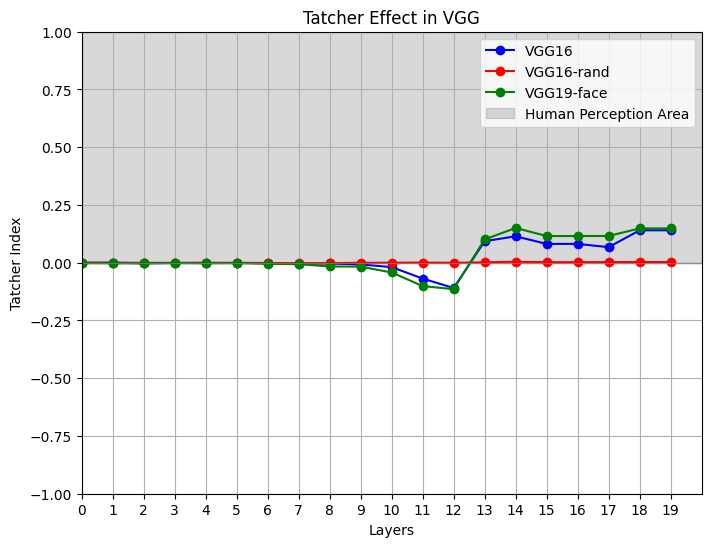

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Compute differences between correlation coefficients across layers


# Create x-axis values (layers)
layers = range(metric_vgg.shape[0])

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

mi=(4.89-2.92)/(4.89+2.92);
reference_name ='Bartlet and Searcy, 1993';

# plt.axhline(y=mi, color='black', linestyle='--', label=' Bartlet and Searcy, 1993 ')

# Plot the differences
ax.plot(layers, metric_vgg, marker='o', linestyle='-', color='b', label='VGG16')
ax.plot(layers, metric_rand, marker='o', linestyle='-', color='r', label='VGG16-rand')
ax.plot(layers, metric_vggface, marker='o', linestyle='-', color='g', label='VGG19-face')

# Set x-axis labels
ax.set_xticks(layers)

# Set y-axis range
ax.set_ylim(-1, 1)

# Draw horizontal line at y=0
ax.axhline(0, color='grey', linewidth=0.5)

x_ = [0, 20, 20, 0, 0]
y_ = [0, 0, 1, 1, 0]
# Set axis limits
plt.xlim(0, 20)
plt.ylim(-1, 1)

# Shade entire region above y=0 with grey
ax.fill_between(x_, y_, color='grey', alpha=0.3, label='Human Perception Area')

# Label axes and title
ax.set_xlabel('Layers')
ax.set_ylabel('Tatcher Index')
ax.set_title('Tatcher Effect in VGG')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


# Resenet

In [35]:
import time
from PIL import Image
import os

# Function to preprocess image
def preprocess_image(image_path):

    transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image_path)
    return image


def extract_features(model):
    model.eval()  # Set the model to evaluation mode

    # Access ResNet components
    resnet_layers = list(model.children())[:-1]  # Exclude the last fully connected layer
    resnet_avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))

    inverted_path = 'images/images/inverted_images'
    normal_path = 'images/images/normal_images'
    nd_path = 'images/images/normal_down'
    iu_path = 'images/images/inv_up'
    features= []
    iter = 0
    for filename in os.listdir(inverted_path):
      feat = []  # Initialize feat list inside the loop
      if filename.endswith('.jpg') or filename.endswith('.png'):
          image_path = os.path.join(inverted_path, filename)
          inv = Image.open(image_path)
          image_path = os.path.join(normal_path, filename)
          norm_up = Image.open(image_path)
          image_path = os.path.join(nd_path, filename)
          norm = Image.open(image_path)
          image_path = os.path.join(iu_path, filename)
          inv_up = Image.open(image_path)
          images = [inv, norm, inv_up, norm_up]
          for g in images:
              image_features = []  # Features for the current image
              image_tensor = preprocess_image(g).unsqueeze(0)
              with torch.no_grad():
                # Extract from convolutional layers
                for layer in resnet_layers:
                    image_tensor = layer(image_tensor)
                    image_features.append(image_tensor.clone())

                # Apply adaptive average pooling
                image_tensor = resnet_avgpool(image_tensor)
                image_tensor = image_tensor.view(image_tensor.size(0), -1)  # Flatten
                image_features.append(image_tensor.clone())  # Add pooled features
              feat.append([image_features])  # Add features for this image
      features.append(feat)
      iter+=1
      if iter == 20:
        break

    return features




dist_type = 'Euclidean'
RC_across_layers = []
model = resnet
features_resnet = extract_features(model)

In [36]:
metric_resnet = []

for i in range(20):
    layer = []
    for k in range(len(features_resnet[0][0][0])-1):
        some = []
        for j in range(4):
            some.append(features_resnet[i][j][0][k])
        d = tatcher(some)
        layer.append(d)
    metric_resnet.append(layer)


In [37]:
metric_resnet = np.array(metric_resnet)
metric_resnet = np.mean(metric_resnet, axis = 0)
print(metric_resnet)

[-4.0550117e-04 -9.1354240e-04 -1.1694183e-03  8.2882703e-05
 -5.8630446e-04  1.4798320e-04  1.9146843e-02  8.1924662e-02
  1.3359356e-01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Compute differences between correlation coefficients across layers


# Create x-axis values (layers)
layers = range(metric_resnet.shape[0])

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the differences
ax.plot(layers, metric_resnet, marker='o', linestyle='-', color='b', label='resnet')
# ax.plot(layers, metric_rand, marker='o', linestyle='-', color='r', label='VGG16-rand')

# Set x-axis labels
ax.set_xticks(layers)

# Set y-axis range
ax.set_ylim(-1, 1)

# Draw horizontal line at y=0
ax.axhline(0, color='grey', linewidth=0.5)

x_ = [0, 8, 8, 0, 0]
y_ = [0, 0, 1, 1, 0]
# Set axis limits
plt.xlim(0, 8)
plt.ylim(-1, 1)

# Shade entire region above y=0 with grey
ax.fill_between(x_, y_, color='grey', alpha=0.3, label='Human Perception Area')

# Label axes and title
ax.set_xlabel('Layers')
ax.set_ylabel('Correlation Difference')
ax.set_title('Difference in Correlation Coefficients Across Layers')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [38]:

dist_type = 'Euclidean'
RC_across_layers = []
model = resnet_rand
features_resnet = extract_features(model)

In [39]:
metric_resnetr = []

for i in range(20):
    layer = []
    for k in range(len(features_resnet[0][0][0])-1):
        some = []
        for j in range(4):
            some.append(features_resnet[i][j][0][k])
        d = tatcher(some)
        layer.append(d)
    metric_resnetr.append(layer)


In [40]:
metric_resnetr = np.array(metric_resnetr)
metric_resnetr = np.mean(metric_resnetr, axis = 0)
print(metric_resnetr)

[0.00023081 0.0002308  0.00012959 0.00123049 0.00151956 0.0007216
 0.00455317 0.01367278 0.01185821]


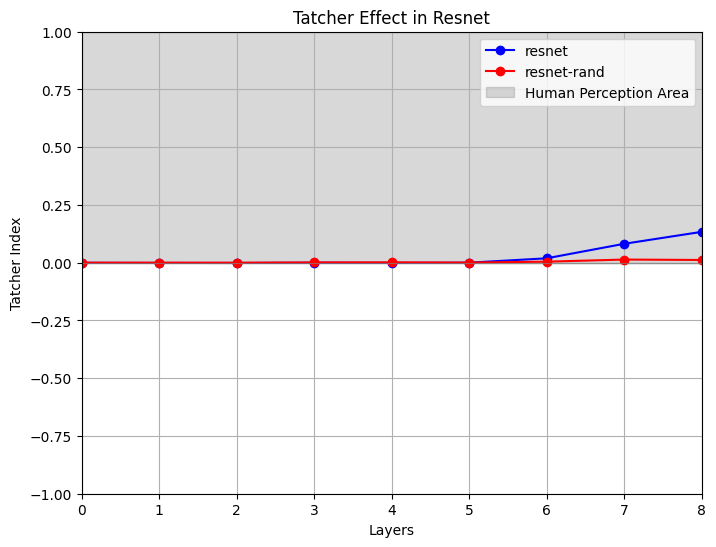

In [41]:
import numpy as np
import matplotlib.pyplot as plt


# Compute differences between correlation coefficients across layers


# Create x-axis values (layers)
layers = range(metric_resnet.shape[0])

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the differences
ax.plot(layers, metric_resnet, marker='o', linestyle='-', color='b', label='resnet')
ax.plot(layers, metric_resnetr, marker='o', linestyle='-', color='r', label='resnet-rand')

# Set x-axis labels
ax.set_xticks(layers)

# Set y-axis range
ax.set_ylim(-1, 1)

# Draw horizontal line at y=0
ax.axhline(0, color='grey', linewidth=0.5)

x_ = [0, 8, 8, 0, 0]
y_ = [0, 0, 1, 1, 0]
# Set axis limits
plt.xlim(0, 8)
plt.ylim(-1, 1)

# Shade entire region above y=0 with grey
ax.fill_between(x_, y_, color='grey', alpha=0.3, label='Human Perception Area')

# Label axes and title
ax.set_xlabel('Layers')
ax.set_ylabel('Tatcher Index')
ax.set_title('Tatcher Effect in Resnet')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


# Vision Transformer

In [ ]:
!git clone https://github.com/huggingface/pytorch-image-models.git
!pip install -e pytorch-image-models

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 16645, done.
remote: Counting objects: 100% (572/572), done.
remote: Compressing objects: 100% (285/285), done.
remote: Total 16645 (delta 357), reused 423 (delta 281), pack-reused 16073
Receiving objects: 100% (16645/16645), 25.37 MiB | 10.72 MiB/s, done.
Resolving deltas: 100% (12189/12189), done.
Obtaining file:///content/pytorch-image-models
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64

In [ ]:
import os
os.chdir('pytorch-image-models')

In [ ]:
import timm
# Load pre-trained ViT model
vit = timm.create_model('vit_base_patch16_224', pretrained=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
layer_output = vit.forward_intermediates(g, intermediates_only=True)

In [ ]:
img_path = '../images/images/inv_up/000100.jpg'
inv = Image.open(img_path)
image_tensor = preprocess_image(inv).unsqueeze(0)
layer_output = model.forward_intermediates(image_tensor, intermediates_only=True)


NameError: name 'preprocess_image' is not defined

In [ ]:
import time
from PIL import Image
import os

# Function to preprocess image
def preprocess_image(image_path):

    transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = transform(image_path)
    return image


def extract_features(model):

    inverted_path = '../images/images/inverted_images'
    normal_path = '../images/images/normal_images'
    nd_path = '../images/images/normal_down'
    iu_path = '../images/images/inv_up'
    features= []
    iter = 0
    for filename in os.listdir(inverted_path):
      feat = []  # Initialize feat list inside the loop
      if filename.endswith('.jpg') or filename.endswith('.png'):
          image_path = os.path.join(inverted_path, filename)
          inv = Image.open(image_path)
          image_path = os.path.join(normal_path, filename)
          norm_up = Image.open(image_path)
          image_path = os.path.join(nd_path, filename)
          norm = Image.open(image_path)
          image_path = os.path.join(iu_path, filename)
          inv_up = Image.open(image_path)
          print(inv_up)
          images = [inv, norm, inv_up, norm_up]
          for g in images:
              image_features = []  # Features for the current image
              image_tensor = preprocess_image(g).unsqueeze(0)
              layer_output = model.forward_intermediates(image_tensor, intermediates_only=True)
              feat.append(layer_output)  # Add features for this image
      features.append(feat)
      iter+=1
      if iter == 20:
        break

    return features




dist_type = 'Euclidean'
RC_across_layers = []
model = vit
features_vit = extract_features(model)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C85B10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C85F90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C84280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C85F90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C85E40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C85F90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C87190>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C871C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C85FF0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C85D80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBB6C85EA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7BFBC9F834C0>
<PIL.JpegImagePl

In [ ]:
len(features_vit[0][0])

12

In [ ]:
metric_vit = []

for i in range(20):
    layer = []
    for k in range(len(features_vit[0][0])-1):
        some = []
        for j in range(4):
            some.append(features_vit[i][j][k].detach().numpy())  # Detach and convert to NumPy array
        d = tatcher(some)
        layer.append(d)
    metric_vit.append(layer)


In [ ]:
metric_vit = np.array(metric_vit)
metric_vit = np.mean(metric_vit, axis = 0)
print(metric_vit)

[-0.00037067 -0.00017802 -0.00060029 -0.00072773 -0.00318911 -0.00804769
 -0.01118719 -0.01453453 -0.01593844 -0.01752383 -0.0129679 ]


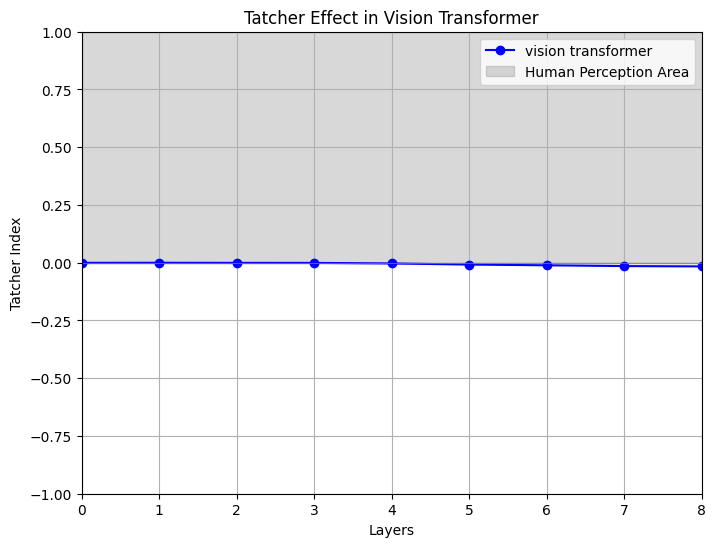

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Compute differences between correlation coefficients across layers


# Create x-axis values (layers)
layers = range(metric_vit.shape[0])

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the differences
ax.plot(layers, metric_vit, marker='o', linestyle='-', color='b', label='vision transformer')
# ax.plot(layers, metric_resnetr, marker='o', linestyle='-', color='r', label='resnet-rand')

# Set x-axis labels
ax.set_xticks(layers)

# Set y-axis range
ax.set_ylim(-1, 1)

# Draw horizontal line at y=0
ax.axhline(0, color='grey', linewidth=0.5)

x_ = [0, 8, 8, 0, 0]
y_ = [0, 0, 1, 1, 0]
# Set axis limits
plt.xlim(0, 8)
plt.ylim(-1, 1)

# Shade entire region above y=0 with grey
ax.fill_between(x_, y_, color='grey', alpha=0.3, label='Human Perception Area')

# Label axes and title
ax.set_xlabel('Layers')
ax.set_ylabel('Tatcher Index')
ax.set_title('Tatcher Effect in Vision Transformer')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


# Inception